<a href="https://colab.research.google.com/github/TKhahahah/BSC_DPDM2025/blob/main/Ch5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from sklearn.datasets import load_digits

# Load the MNIST dataset (specifically the digits dataset, which is a common small version of MNIST)
digits = load_digits()

X = digits.data
y = digits.target

print(f"Shape of data (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"Number of classes: {len(digits.target_names)}")
print(f"First 5 target labels: {y[:5]}")

Shape of data (X): (1797, 64)
Shape of target (y): (1797,)
Number of classes: 10
First 5 target labels: [0 1 2 3 4]


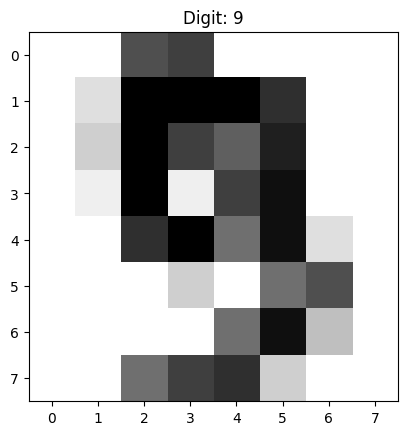

The digit shown is: 9


In [19]:
import matplotlib.pyplot as plt

# Select the first image and its label
image_index = 9
some_digit = X[image_index]
some_digit_image = some_digit.reshape(8, 8)

# Display the image
plt.imshow(some_digit_image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Digit: {y[image_index]}")
# plt.axis('off')
plt.show()

print(f"The digit shown is: {y[image_index]}")

ML ที่ใช้อ่านโค้ดไปรษณีย์ ว่าแต่ละตัวคือเลขอะไร

สร้างคอลัมน์อธิบายลักษณะของมัน ถ้ามีเป็น 1 ไม่มีเป็น 0 เป็นต้น

In [20]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [27]:
import pandas as pd

# Create a DataFrame for the features
df = pd.DataFrame(digits.data)

# Add the target column
df['target'] = digits.target

# Display the first few rows of the DataFrame
print("DataFrame created succesfully with shape:", df.shape)

DataFrame created succesfully with shape: (1797, 65)


In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


# Model Construction

-import

-define (Hyper-parameter)

-train (fitting)

-evaluate (วัดผล, train-test)

In [29]:
#แบ่ง train-test set
X.shape

(1797, 64)

In [31]:
X_train = X[:1700]
y_train = y[:1700]
X_test = X[1700:]
y_test = y[1700:]

## Import

In [32]:
from sklearn.tree import DecisionTreeClassifier

## Define

In [41]:
tree0 = DecisionTreeClassifier(random_state=6) #ใส่ default คือทำให้ต้นไม้โตเต็มที่ยังไม่ต้องใส่ค่าอะไร


## Training

In [42]:
tree0.fit(X_train,y_train)

DecisionTreeClassifier(random_state=6)

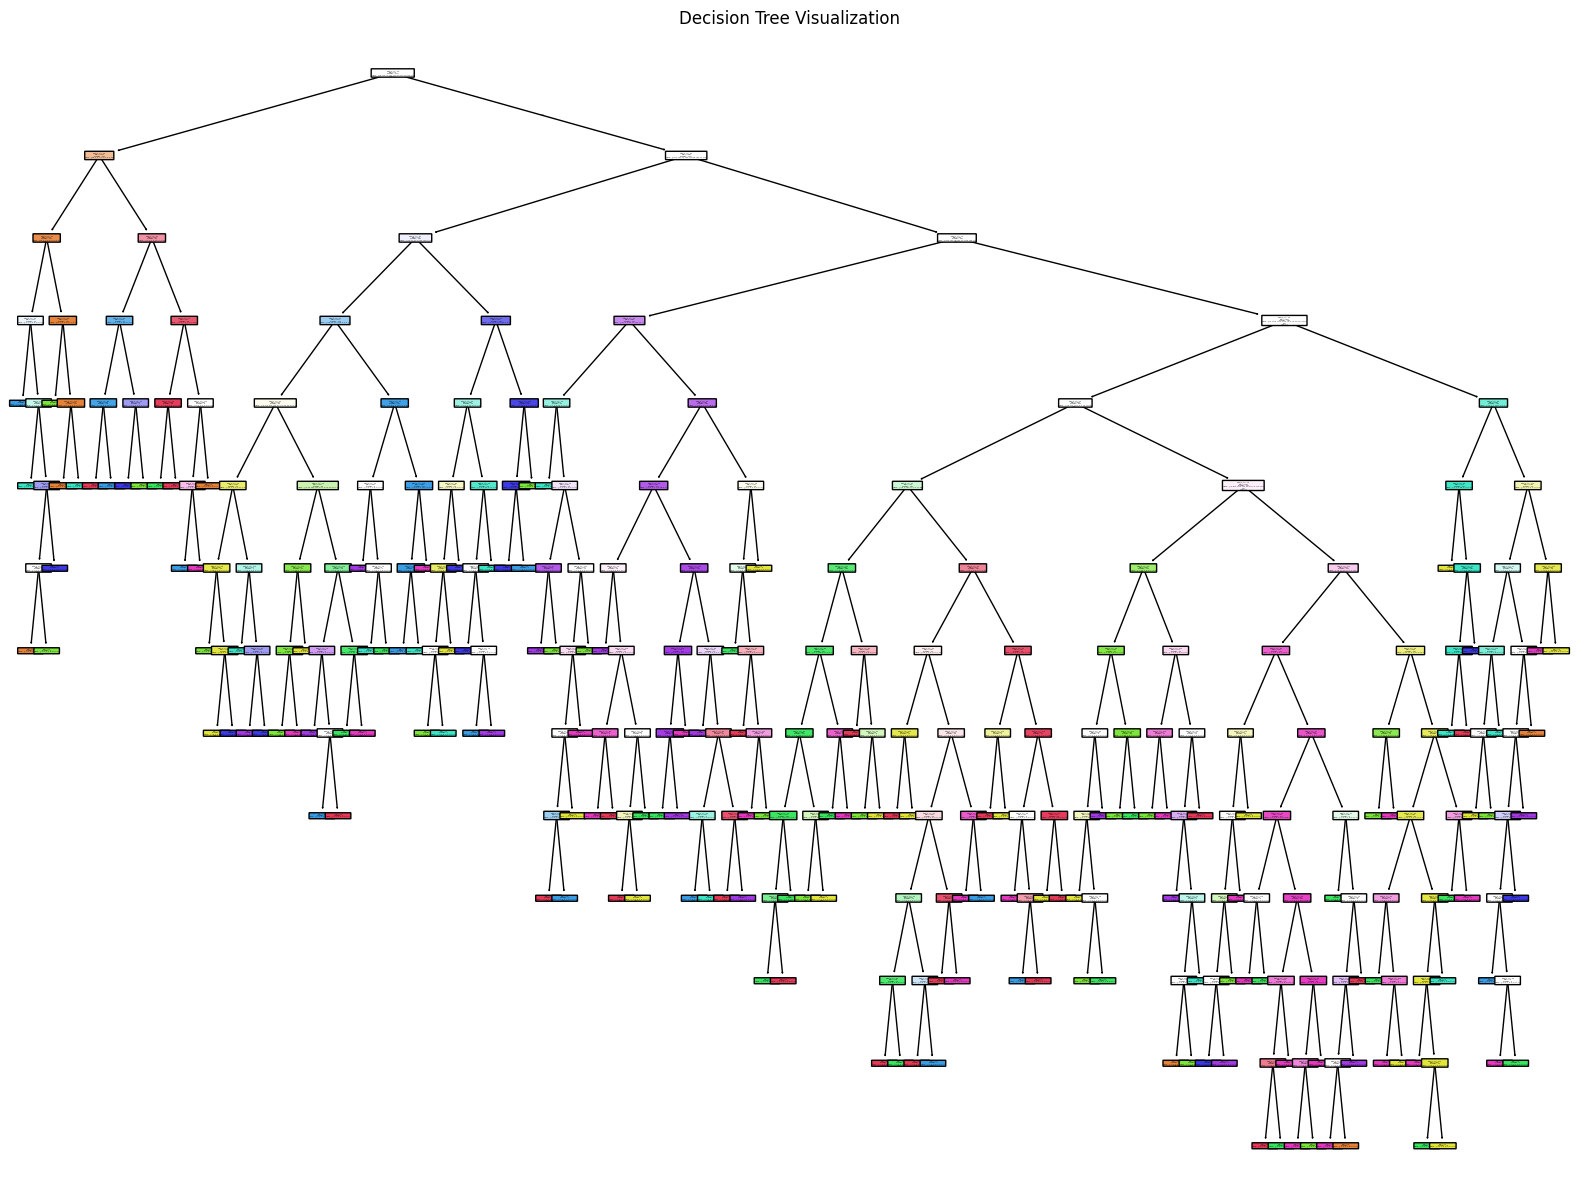

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree0, feature_names=[f'pixel_{i//8}_{i%8}' for i in range(X.shape[1])], class_names=[str(i) for i in digits.target_names], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

## Evaluate

In [44]:
y_predict = tree0.predict(X_test)

In [45]:
y_predict

array([8, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 9, 5, 1, 0, 0, 6, 2, 7, 8, 2,
       0, 3, 8, 6, 8, 8, 7, 4, 3, 4, 6, 6, 6, 4, 9, 1, 9, 0, 9, 6, 7, 8,
       2, 0, 0, 6, 7, 6, 8, 2, 1, 7, 4, 6, 3, 1, 2, 9, 1, 7, 6, 8, 4, 8,
       1, 4, 0, 5, 5, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 5, 2, 2, 5, 7, 9, 4,
       4, 3, 3, 4, 9, 0, 8, 9, 8])

In [46]:
y_test

array([5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2,
       0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8,
       2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3,
       1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 8, 8, 4, 9, 0, 8, 9, 8])

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7938144329896907

ทำให่โมเดลมีความแม่นยำขึ้น

## Pre-pruning(hyper-parameter tunning)

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree0 = DecisionTreeClassifier(random_state=6, max_depth=3)
tree0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=6)

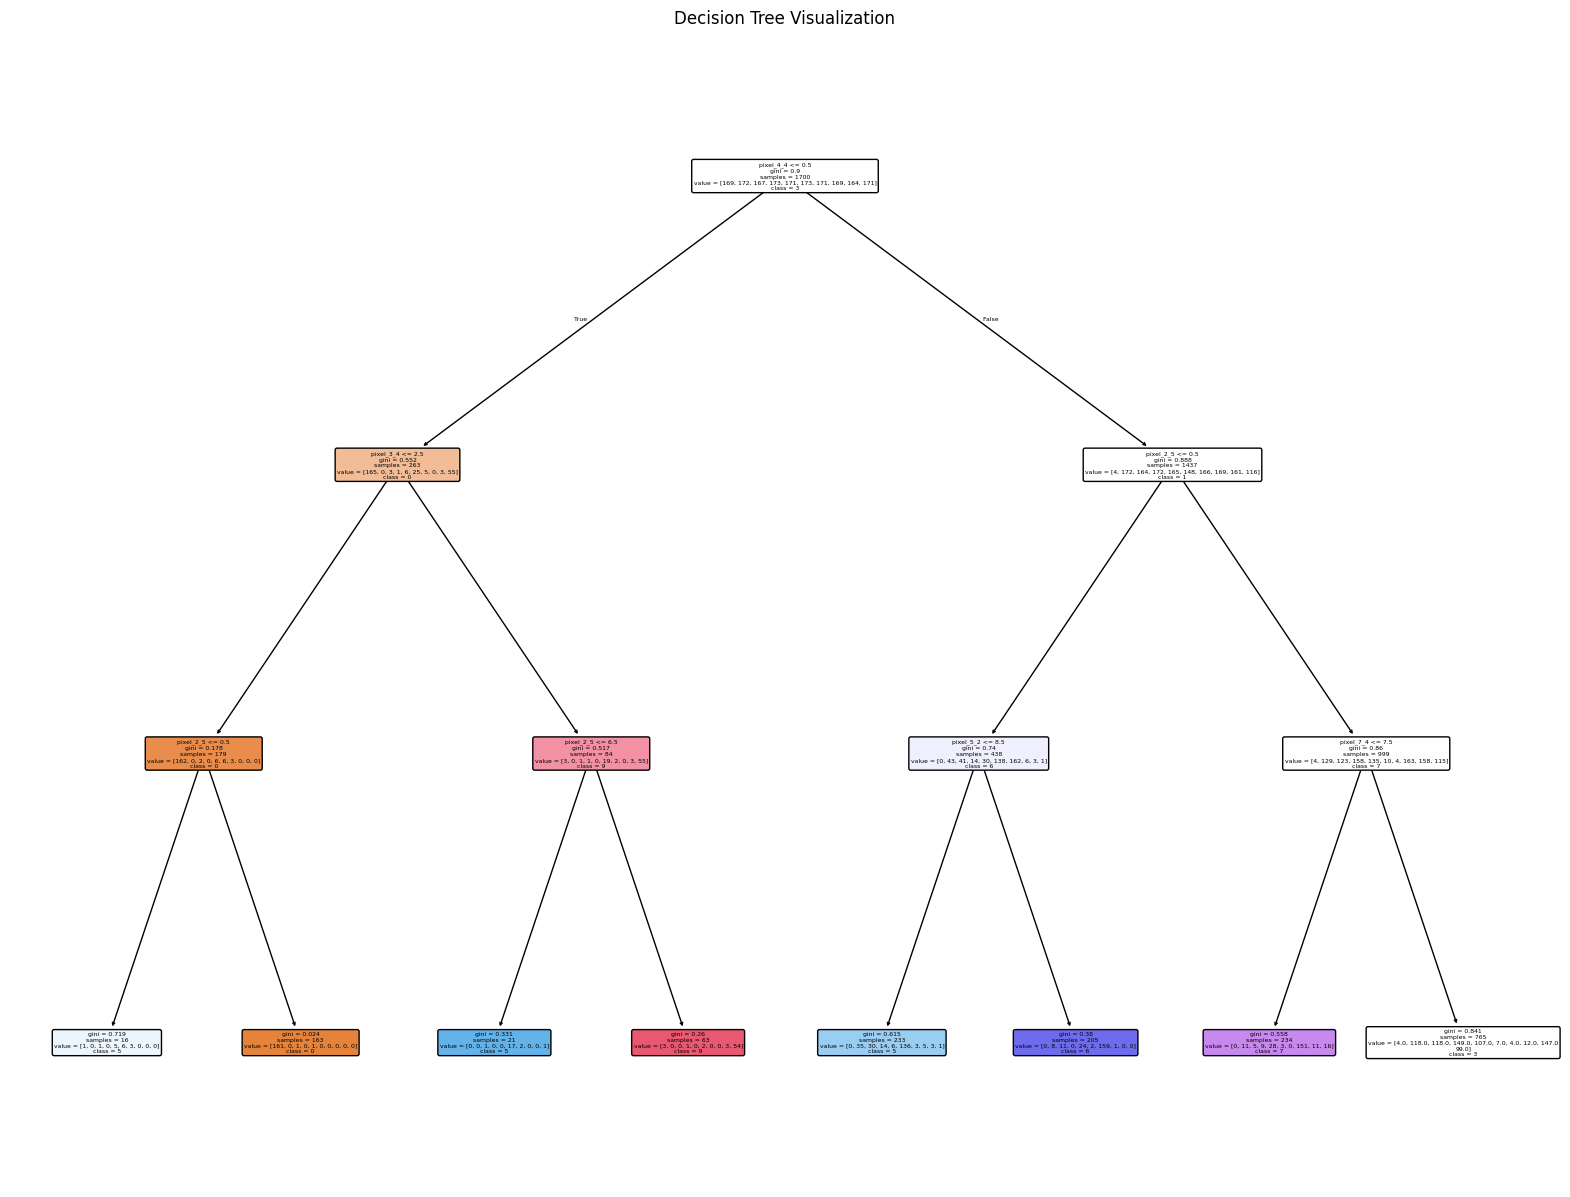

In [50]:
plt.figure(figsize=(20,15))
plot_tree(tree0, feature_names=[f'pixel_{i//8}_{i%8}' for i in range(X.shape[1])], class_names=[str(i) for i in digits.target_names], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

## Evaluate 2

In [51]:
y_predict = tree0.predict(X_test)
accuracy_score(y_test, y_predict)

0.4639175257731959

## Tree 2


In [54]:
tree2 = DecisionTreeClassifier(random_state=6, max_depth=7)
tree2.fit(X_train, y_train)
y_predict = tree2.predict(X_test)
accuracy_score(y_test, y_predict)

0.7938144329896907

#Quiz 14

tune hyper-parameter sp that the accuracy is better than default (at random_stat 6)

In [88]:
tree2 = DecisionTreeClassifier(random_state=6, min_samples_split=4, min_samples_leaf=2)
tree2.fit(X_train, y_train)
y_predict = tree2.predict(X_test)
accuracy_score(y_test, y_predict)

0.8762886597938144